# Classifying Digits

## Importing Libraries

In [22]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time as time
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

## Importing and Checking Data

In [2]:
# Import the csv file
train = pd.read_csv('../dataset/train.csv')

In [3]:
# Check the data
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Check for missing values
print(train.isnull().sum().sum())

0


In [5]:
# Check the number of rows and columns
print(train.shape)

(42000, 785)


In [6]:
# Seperate the true labels and drop the labels in the dataframe
label = train.label
train.drop('label', axis = 1, inplace=True)
print(train.shape)

(42000, 784)


## Image

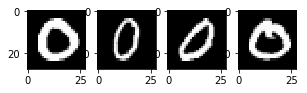

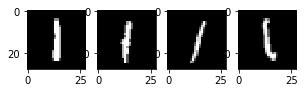

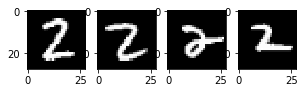

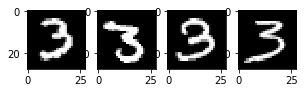

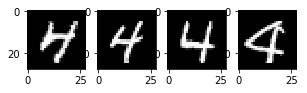

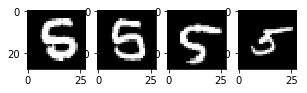

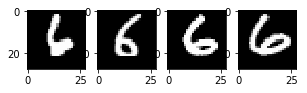

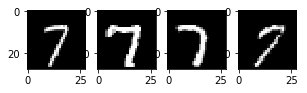

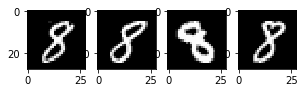

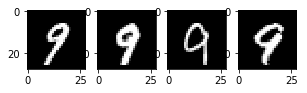

In [8]:
# Check the images of the number in gray scale
for x in range(0,10):
    train_0=train[label==x]
    data_new=[]
    for idx in train_0.index:
        val=train_0.loc[idx].values.reshape(28,28)
        data_new.append(val)
    plt.figure(figsize=(25,25))   
    for x in range(1,5):
        ax1=plt.subplot(1, 20, x)
        ax1.imshow(data_new[x],cmap='gray')

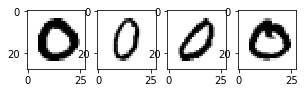

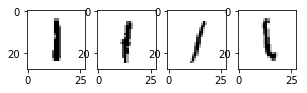

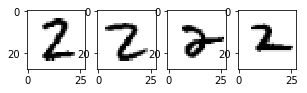

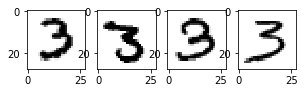

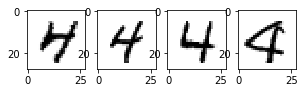

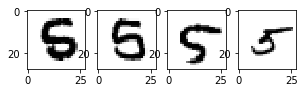

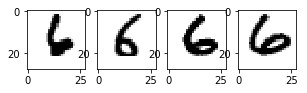

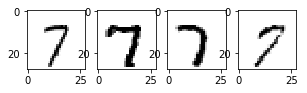

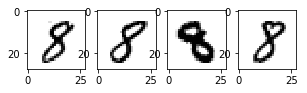

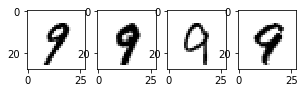

In [9]:
# Check the images of the number in black and white scale
for x in range(0,10):
    train_0=train[label==x]
    data_new=[]
    for idx in train_0.index:
        val=train_0.loc[idx].values.reshape(28,28)
        data_new.append(val)
    plt.figure(figsize=(25,25))   
    for x in range(1,5):
        ax1=plt.subplot(1, 20, x)
        ax1.imshow(data_new[x],cmap='binary')

## Train/Test Spilt

In [13]:
# Train/Test split the dataframe
train_new, test_new,train_labels, test_labels = train_test_split(train, label, stratify=label, test_size=0.2, random_state=42)

In [14]:
# Check the shape of the new train and test dataframes
print(train_new.shape)
print(train_labels.shape)
print(test_new.shape)
print(test_labels.shape)

(33600, 784)
(33600,)
(8400, 784)
(8400,)


## Modeling

### Gray-Scale Image

In [12]:
# Initiate the SVC model
score = []
fittime = []
svm = SVC(gamma='auto', random_state=42, verbose=True)

In [13]:
# Fit and score the model and compute time, train accuracy and test accuracy
start_time = time.time()
svm.fit(train_new, train_labels.values.ravel())
fittime = time.time() - start_time
print("Time consumed: ",time.strftime("%H:%M:%S", time.gmtime(fittime)))
train_score = svm.score(train_new,train_labels)
test_score = svm.score(test_new,test_labels)
print("Train Accuracy: ",train_score)
print("Test Accuracy: ",test_score)

[LibSVM]Time consumed:  00:32:05
Train Accuracy:  1.0
Test Accuracy:  0.10821428571428572


### Binary Image

In [14]:
# Make a new dataframe and modify the data to binary (black and white) images
train_b = train_new.copy()
test_b = test_new.copy()
train_b[train_b>0] = 1
test_b[test_b>0] = 1

In [15]:
# Fit and score the model and compute time, train accuracy and test accuracy
start_time = time.time()
svm.fit(train_b, train_labels.values.ravel())
fittime2 = time.time() - start_time
print("Time consumed: ",time.strftime("%H:%M:%S", time.gmtime(fittime2)))
train_score2=svm.score(train_b,train_labels)
test_score2=svm.score(test_b,test_labels)
print("Train Accuracy: ",train_score2)
print("Test Accuracy: ",test_score2)

[LibSVM]Time consumed:  00:03:21
Train Accuracy:  0.9467857142857142
Test Accuracy:  0.9382142857142857


## Modeling with PCA

### Gray Scale

In [16]:
# Standardized data
ss = StandardScaler()
X_std_train = ss.fit_transform(train_new)
X_std_test = ss.transform(test_new)

# Perform PCA and check how many components needed 
pca = PCA().fit(X_std_train)
n_comp = len(pca.explained_variance_ratio_.cumsum()[pca.explained_variance_ratio_.cumsum() <= 0.90])
print("Keeping 90% Info with ",n_comp," components")

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


Keeping 90% Info with  222  components


In [17]:
# Covert the data with the necessary components
pca2 = PCA(n_components=n_comp)
train_pca_b = pca2.fit_transform(X_std_train)
test_pca_b = pca2.transform(X_std_test)

In [19]:
# Fit and score the model and compute time, train accuracy and test accuracy
start_time = time.time()
svm.fit(train_pca_b, train_labels.values.ravel())
fittime3 = time.time() - start_time
print("Time consumed: ",time.strftime("%H:%M:%S", time.gmtime(fittime3)))
train_score3 = svm.score(train_pca_b,train_labels)
test_score3 = svm.score(test_pca_b,test_labels)
print("Train Accuracy: ",train_score3)
print("Test Accuracy: ",test_score3)

[LibSVM]Time consumed:  00:02:36
Train Accuracy:  0.9953869047619047
Test Accuracy:  0.9504761904761905


### Binary

In [20]:
# Standardized binary data
ss = StandardScaler()
X_std_train = ss.fit_transform(train_b)
X_std_test = ss.transform(test_b)

# Perform PCA and check how many components needed 
pca = PCA().fit(X_std_train)
n_comp2 = len(pca.explained_variance_ratio_.cumsum()[pca.explained_variance_ratio_.cumsum() <= 0.90])
print("Keeping 90% Info with ",n_comp," components")

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


Keeping 90% Info with  222  components


In [21]:
# Covert the data with the necessary components
pca3 = PCA(n_components = n_comp2)
train_pca_b = pca3.fit_transform(X_std_train)
test_pca_b = pca3.transform(X_std_test)

In [22]:
# Fit and score the model and compute time, train accuracy and test accuracy
start_time = time.time()
svm.fit(train_pca_b, train_labels.values.ravel())
fittime4 = time.time() - start_time
print("Time consumed to fit model: ",time.strftime("%H:%M:%S", time.gmtime(fittime4)))
train_score4=svm.score(train_pca_b,train_labels)
test_score4=svm.score(test_pca_b,test_labels)
print("Train Accuracy: ",train_score4)
print("Test Accuracy: ",test_score4)

[LibSVM]Time consumed to fit model:  00:02:35
Train Accuracy:  0.9934821428571429
Test Accuracy:  0.9583333333333334


## Compare Score and Time

In [33]:
# Make a dataframe of the different models with Train and Test scores
name = ['Gray Scale', 'Gray Scale (PCA)', 'Binary', ' Binary(PCA)']
score_train = [train_score, train_score3, train_score2, train_score4]
score_test = [test_score, test_score3, test_score2, test_score4]
time_fit = [fittime, fittime3, fittime2, fittime4]

result_score = pd.DataFrame({'Train Score': score_train,
                      'Test Score': score_test}, index = name)
result_score

,Train Score,Test Score
Gray Scale,1.000000,0.108214
Gray Scale (PCA),0.995387,0.950476
Binary,0.946786,0.938214
Binary(PCA),0.993482,0.958333


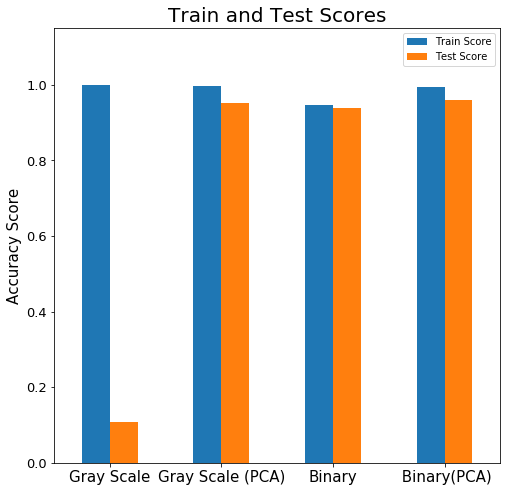

In [40]:
# Plot the scores of the models
result_score.plot(kind='bar', rot= 0, figsize=(8,8))
plt.ylabel('Accuracy Score', fontsize = 15)
plt.xticks(fontsize = 15)
plt.title('Train and Test Scores', fontsize = 20)
plt.rc('ytick',labelsize=13)
plt.ylim(0,1.15);

- The Binary image with PCA model performed the best accuracy score

In [38]:
# Make a dataframe of the different models with time consumed to fit the model
result_time = pd.DataFrame({'Fit Time (sec)': time_fit}, index = name)
result_time

,Fit Time (sec)
Gray Scale,1925.896423
Gray Scale (PCA),156.586496
Binary,201.963413
Binary(PCA),155.307704


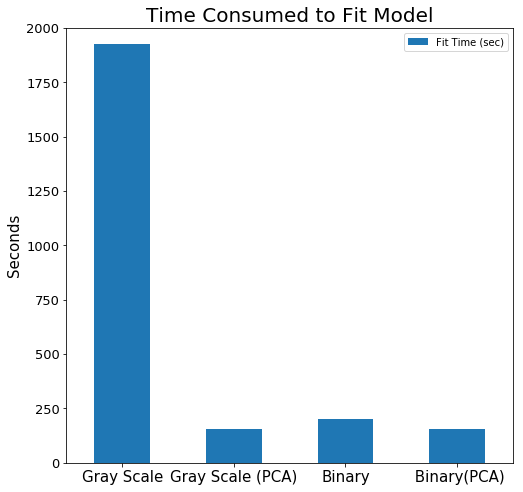

In [39]:
# Plot the time consumed of the models
result_time.plot(kind='bar', rot= 0, figsize=(8,8))
plt.ylabel('Seconds', fontsize = 15)
plt.xticks(fontsize = 15)
plt.title('Time Consumed to Fit Model', fontsize = 20)
plt.rc('ytick',labelsize=13)
plt.ylim(0,2000);

- The PCA models took the least amount of time to fit the model

## Grid Search

In [10]:
# Make a new dataframe and modify the data to binary (black and white) images
train_b = train_new.copy()
test_b = test_new.copy()
train_b[train_b>0] = 1
test_b[test_b>0] = 1

In [11]:
# Make a pipeline to scale the image data, perform PCA and fit the Support Vector Classifier model.
features = Pipeline([
    ('scale', StandardScaler()),
    ('pca', PCA(n_components=222)),
    ('svm', SVC(verbose = True))
])

# Set the parameters to grid search over
param = {
    'svm__gamma': [1, 0.1, 0.01, 0.001]
}

In [12]:
# Perform Grid Search over the set parameters
# Used AWS since the process takes a while with big dataset
gs = GridSearchCV(features, param, cv = 3, verbose = 2, n_jobs=-1)
gs.fit(train_b, train_labels)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] svm__gamma=1 ....................................................
[CV] svm__gamma=1 ....................................................
[LibSVM][CV] ..................................... svm__gamma=1, total=23.0min
[CV] svm__gamma=1 ....................................................
[LibSVM][CV] ..................................... svm__gamma=1, total=23.0min
[CV] svm__gamma=0.1 ..................................................
[LibSVM][CV] ..................................... svm__gamma=1, total=24.8min
[CV] svm__gamma=0.1 ..................................................
[LibSVM][CV] ................................... svm__gamma=0.1, total=25.1min
[CV] svm__gamma=0.1 ..................................................
[LibSVM][CV] ................................... svm__gamma=0.1, total=25.1min
[CV] svm__gamma=0.01 .................................................
[LibSVM][CV] ...................................

[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed: 139.5min finished


[LibSVM]

GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=222, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('svm', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=True))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'svm__gamma': [1, 0.1, 0.01, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [15]:
# Check the best score
gs.best_score_

0.9527083333333334

- The Support Vector Classifier model with gamma of 0.001 performed the best

# Final Model

In [15]:
# Make a new dataframe and modify the data to binary (black and white) images
train_b = train_new.copy()
test_b = test_new.copy()
train_b[train_b>0] = 1
test_b[test_b>0] = 1

In [16]:
# Make a pipeline to scale the image data, perform PCA and fit the Support Vector Classifier model with gamma = 0.001
model = Pipeline([
    ('scale', StandardScaler()),
    ('pca', PCA(n_components=222)),
    ('svm', SVC(gamma = 0.001, verbose = True))
])

In [23]:
# cross validate the model
cross_val_score(model, train_b, train_labels, cv = 3)

[LibSVM][LibSVM][LibSVM]

array([0.95349045, 0.95446429, 0.95088409])

In [24]:
# Fit the model
model.fit(train_b, train_labels)

[LibSVM]

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=222, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('svm', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=True))])

In [25]:
# Print out the train and test accuracy
print('Train Accuracy', model.score(train_b, train_labels))
print('Test Accuracy',model.score(test_b, test_labels))

Train Accuracy 0.9736309523809524
Test Accuracy 0.9563095238095238
